# Introduction


1. State representation for agent
2. Render environment --> show graph + print expression -- fun!!

### Test

In [2]:
import numpy as np
import networkx as x
from operator import truediv

from env_quadratic import *

env = Env()
done = False
action_dim = env.action_dim
actions = list(range(action_dim))
x, a, b, c = symbols('x a b c')
for e in range(10**1):
    state = env.reset()
    ctr = 0 
    done = False
    while not done:
        action = np.random.choice(action_dim)
        if ctr == 0 and action == 15:
            print(f'action_0 = {action}')
        ctr += 1
        state, reward, done, info = env.step(action)
        loss = env.find_loss(state)
        if action == 15 and ctr == 1:
            print(f'S, loss = {state,env.find_loss(state)}')
    if loss == 0:
        print(f'solution is: {state}')
        break
    else:
        if e % 10 == 0:
            print(f'Ep {e}: Terminating')


env.state

TypeError: given an expression, replace() expects another expression or a callable

### Train agent

In [3]:
import numpy as np
import networkx as x

from env_quadratic import *
from stable_baselines3 import A2C

env = Env()
model = A2C("MlpPolicy", env)

state = env.reset()
done = False
action_dim = env.action_dim
while not done:
    action = np.random.choice(action_dim)
    state, reward, done, info = env.step(action)
    loss = env.find_loss(env.state_string)
    if loss == 0:
        print(f'solution is: {env.state_string}')
        break


In [5]:
model.predict(state)

RuntimeError: Class values must be non-negative.

In [6]:
state

array([-3., -4., -6., ...,  0.,  0.,  0.])

NameError: name 'plt' is not defined

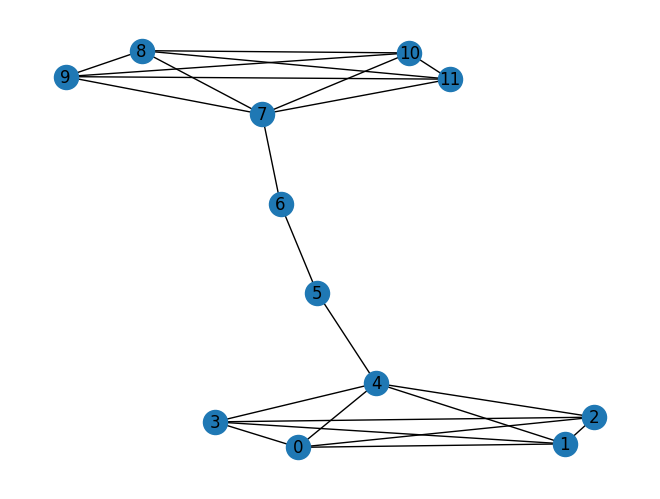

In [7]:
G = nx.barbell_graph(5, 2)
nx.draw(G, with_labels=True)
plt.show()